# **Implementing Multivarite Regression from scratch**

### **Importing Modules**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### **Creating Dataset (From Andrew Ng Supervised ML Course)**

In [2]:
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])

In [3]:
print(X_train)

[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]


In [4]:
y_train = np.array([460, 232, 178])

In [5]:
print(y_train)

[460 232 178]


### **Making the Model**

In [6]:
m=X_train.shape[1]
w=np.zeros(m)
print(w)
print(X_train[0])

[0. 0. 0. 0.]
[2104    5    1   45]


In [7]:
b=0

In [8]:
def Model(X, w, b):
    m = X.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = np.dot(X[i], w) + b  
    return f_wb

In [9]:
prediction=Model(X_train,w,b)
print(prediction)

[0. 0. 0.]


### **Making the Cost Function**


In [10]:
def Cost(y,f_wb):
    m=y.shape[0]
    C=[]
    cost=0
    for i in range (m):
        c=(f_wb[i]-y[i])**2
        C.append(c)
        cost=cost+c
    return cost,C

In [11]:
cost,C=Cost(y_train,prediction)
print(cost)

297108.0


### **Gradient Descent**

In [12]:
def Gradient_Descent(X,y,f_wb,alpha,w,b):
    m=X.shape[0] #number of training examples
    n=X.shape[1] #number of features
    shift_w=np.zeros(n)
    shift_b=0
    for i in range (m):
        diff=(f_wb[i]-y[i])
        shift_b=shift_b+diff
        for j in range (n):
            shift_w[j] =shift_w[j]+diff * X[i, j]
    shift_w = (alpha * shift_w) / m
    shift_b=(alpha*shift_b)/m
    w=w-shift_w
    b=b-shift_b
    return w,b

### **Normalization**

In [13]:
def min_max_normalisation2D(x):
    max=np.max(x,axis=0)
    min=np.min(x,axis=0)
    normalised=(x-min)/(max-min)
    return normalised

In [14]:
def unscale(normalised,max,min):
    print("Diff=",max-min)
    data=((normalised*(max-min))+min)
    return data

In [15]:
X_train_normalised=min_max_normalisation2D(X_train)
y_train_normalised=min_max_normalisation2D(y_train)
print(X_train_normalised)
print(y_train_normalised)

[[1.         1.         0.         1.        ]
 [0.45047923 0.33333333 1.         0.5       ]
 [0.         0.         0.         0.        ]]
[1.         0.19148936 0.        ]


In [16]:
alpha=0.01
w,b=Gradient_Descent(X_train_normalised,y_train_normalised,prediction,alpha,w,b)

In [17]:
print(w,b)

[0.00362087 0.0035461  0.0006383  0.00365248] 0.003971631205673759


In [18]:
max_X=np.max(X_train,axis=0)
min_X=np.min(X_train,axis=0)

In [19]:
max_y=np.max(y_train,axis=0)
min_y=np.min(y_train,axis=0)
print(max_y,min_y)

460 178


In [20]:
prediction=Model(X_train_normalised,w,b)
prediction=unscale(prediction,max_y,min_y)
print(prediction)

Diff= 282
[182.17108626 180.60831149 179.12      ]


In [21]:
print(y_train)

[460 232 178]


In [22]:
i=0
while i<10000:
    alpha=0.005
    w,b=Gradient_Descent(X_train_normalised,y_train_normalised,prediction,alpha,w,b)
    prediction=Model(X_train_normalised,w,b)
    i=i+1
prediction=unscale(prediction,max_y,min_y)
print("Prediction",prediction)
print("Actual",y_train)
cost,C=Cost(y_train,prediction)
print("Cost=",cost)

Diff= 282
Prediction [459.99963091 232.00199493 177.99673283]
Actual [460 232 178]
Cost= 1.4790393576429347e-05


In [23]:
w=0
b=0

416


Text(0.5, 1.0, 'Learning Curve')

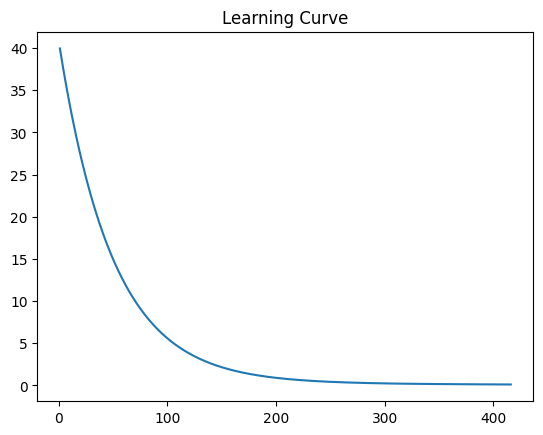

In [24]:
e=0.0005
p=[]
converged=False
old_cost=1
new_cost=0
i=0
while not converged:
    i+=1
    w,b=Gradient_Descent(X_train_normalised,y_train_normalised,prediction,alpha,w,b)
    prediction=Model(X_train_normalised,w,b)
    new_cost,C=Cost(y_train_normalised,prediction)
    p.append(new_cost)
    if abs(new_cost-old_cost)<e:
        converged=True
    old_cost=new_cost
print(i)
z=range(1,i+1)
plt.plot(z,p)
plt.title("Learning Curve")

In [25]:
print(cost)

1.4790393576429347e-05


In [26]:
print(prediction)

[0.73056155 0.35277843 0.07962476]
